# Assignment #2, Heart Disease
### deadline Jan 11, 2021 13:00 Hrs

Recently, machine learning is being used to diagnose diseases at the earliest stage. This also helps the doctors to reduce the cost of health care. For this purpose, some data has been collected at [UCI machine learning data set](http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data) .

The features or attributes are

- age - age in years      
- sex - sex (1 = male; 0 = female)       
- cp: chest pain type
- trestbpss: resting blood pressure (in mm Hg on admission to the hospital)  
- chol: serum cholestoral in mg/dl      
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)       
- restecg: resting electrocardiographic results
- thalach : maximum heart rate achieved
- exang : exercise induced angina (1 = yes; 0 = no)
- oldpeak : ST depression induced by exercise relative to rest
- slope : the slope of the peak exercise ST segment
- ca : number of major vessels (0-3) colored by flourosopy
- thal : 3 = normal; 6 = fixed defect; 7 = reversable defect

The target is 
- num : diagnosis of heart disease (angiographic disease status) - values range from 0 - 4

All the above 13 attributes are used to predict the target. 

Read the given and then apply a suitable machine learning technique (Naive, Bayes, KNN, Decision Tree, Random Forest) to predict the heart disease stage.
Next tune the hyperparameters to achieve the best scores and respective parameters. At the end, You will submit the working notebook along with a summary of models with best parameters, that helped you find the best model.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg",
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df= pd.read_table("heart", sep=',', header=None, names=columns, na_values='?')
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df.tail()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [4]:
df.shape

(303, 14)

In [5]:
df.isnull().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         4
thal       2
target     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age        303 non-null float64
sex        303 non-null float64
cp         303 non-null float64
restbp     303 non-null float64
chol       303 non-null float64
fbs        303 non-null float64
restecg    303 non-null float64
thalach    303 non-null float64
exang      303 non-null float64
oldpeak    303 non-null float64
slope      303 non-null float64
ca         299 non-null float64
thal       301 non-null float64
target     303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [7]:
df.tail()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


[]

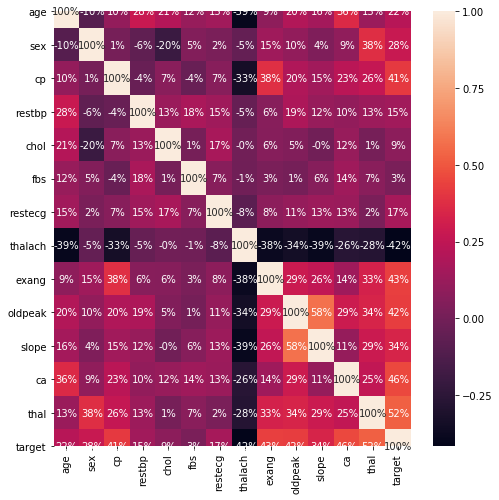

In [52]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,fmt=".0%")
plt.plot()

In [9]:
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

In [10]:
df.isnull().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
target     0
dtype: int64

In [11]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [12]:
print(x.shape)
print(y.shape)

(303, 13)
(303,)


In [13]:
import numpy as np
np.bincount(y)

array([164, 139], dtype=int64)

# Train Test split and Standarization

In [14]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler as ss
sc = ss()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

In [15]:
print('All:     ', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:    ', np.bincount(test_y) / float(len(test_y)) * 100.0)

All:      [54.12541254 45.87458746]
Training: [53.30578512 46.69421488]
Test:     [57.37704918 42.62295082]


# Stratify

In [16]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 0,stratify=y)

In [17]:
print('All:     ', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:    ', np.bincount(test_y) / float(len(test_y)) * 100.0)

All:      [54.12541254 45.87458746]
Training: [54.1322314 45.8677686]
Test:     [54.09836066 45.90163934]


# KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

#     Using 10 neighbours

In [19]:
x = df.iloc[:, :-1].values
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
y = df.iloc[:, -1].values

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 0,stratify=y)
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(train_x,train_y)
pred_y = KNN.predict(test_x)
print('Accuracy Score:',accuracy_score(test_y,pred_y))

Accuracy Score: 0.8688524590163934


0.8688524590163934


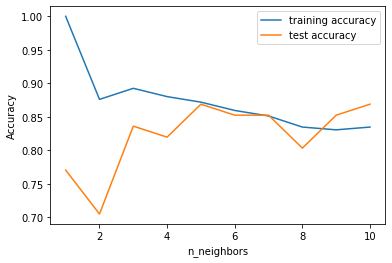

In [21]:
x = df.iloc[:, :-1].values
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
y = df.iloc[:, -1].values
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 0,stratify=y)

training_accuracy = []
test_accuracy = []
neighbors = range(1, 11)
for n_neighbors in neighbors:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(train_x, train_y)
    training_accuracy.append(clf.score(train_x, train_y))
    test_accuracy.append(clf.score(test_x, test_y))
       
plt.plot(neighbors, training_accuracy, label="training accuracy")
plt.plot(neighbors, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
print(max(test_accuracy))


# Cross-validation

Maximum 0.8373674453096032


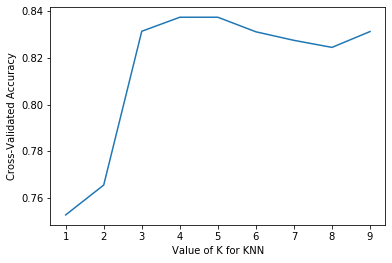

In [23]:
x = df.iloc[:, :-1].values
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
y = df.iloc[:, -1].values

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 0,stratify=y)
k_range = list(range(1, 10))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    #print(scores.mean(),k)
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
print("Maximum",max(k_scores))

# Distances with cross valiation

In [25]:
x = df.iloc[:, :-1].values
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
y = df.iloc[:, -1].values

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 0,stratify=y)
best_score = 0
neighbors = range(1, 11)
for n in neighbors:
    for w in ['uniform', 'distance']:
        knn = KNeighborsClassifier(n_neighbors= n,weights=w)
        scores = cross_val_score(knn, train_x, train_y, cv=10)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'n_neighbors': n, 'weights': w}
knn = KNeighborsClassifier(**best_parameters)
knn.fit(train_x, train_y)
test_score = knn.score(test_x, test_y)
print("Best score on validation set: ", best_score)
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: ", test_score)


Best score on validation set:  0.8224358974358974
Best parameters:  {'n_neighbors': 10, 'weights': 'uniform'}
Test set score with best parameters:  0.8688524590163934


# naive bayes

In [26]:
x = df.iloc[:, :-1].values
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
y = df.iloc[:, -1].values
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 0,stratify=y)

In [27]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(train_x, train_y)
score=cross_val_score(classifier,x,y,cv=10)
print("Accuracy using 10 fold cross validation: ",score.mean())


Accuracy using 10 fold cross validation:  0.8411531331108639


# Random Forest

In [47]:
x = df.iloc[:, :-1].values
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
y = df.iloc[:, -1].values

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 0,stratify=y)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [48]:
n_estimators = [10,15,19,23,38,45,67,88]
criterion=['gini','entropy']
max_features = ['auto', 'sqrt']
param_grid = {'n_estimators': n_estimators,'criterion':criterion,'max_features': max_features}

classifier = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, cv = 5)
grid_search.fit(train_x,train_y)
train_score = grid_search.score(train_x,train_y)
test_score = grid_search.score(test_x, test_y)
print("Training Accuracy",train_score*100)
print("Testing Accuracy",test_score*100)
print("Best Parameters :",grid_search.best_params_)

Training Accuracy 98.34710743801654
Testing Accuracy 85.24590163934425
Best Parameters : {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 10}


C:\Users\mahno\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
